In [2]:
# === Librerías Estándar ===
import re  # Expresiones regulares
import math  # Operaciones matemáticas
import warnings  # Manejo de advertencias

# === Manipulación y Análisis de Datos ===
import pandas as pd  # Análisis y manejo de datos
import numpy as np  # Operaciones numéricas y arrays

# === Visualización ===
import matplotlib.pyplot as plt  # Gráficos básicos
import seaborn as sns  # Gráficos avanzados
sns.set_style('whitegrid')  # Estilo predeterminado para gráficos

# === Selección de Modelos y Preprocesamiento ===
from sklearn.model_selection import (
    train_test_split,  # Dividir datos en entrenamiento y prueba
    GridSearchCV,  # Búsqueda de hiperparámetros
    StratifiedKFold  # Validación cruzada estratificada
)
from sklearn.preprocessing import StandardScaler  # Escalado de datos
from sklearn.feature_selection import SelectKBest, f_classif  # Selección de características

# === Manejo de Desbalanceo de Clases ===
from imblearn.combine import SMOTETomek  # Combinación de SMOTE y Tomek Links

# === Modelos de Aprendizaje Automático ===
from sklearn.linear_model import LogisticRegression  # Regresión Logística
from xgboost import XGBClassifier, XGBRegressor  # Clasificador y Regresor de XGBoost
from lightgbm import LGBMClassifier  # Clasificador de LightGBM
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor  # Clasificador y Regresor Random Forest

# === Evaluación de Modelos y Métricas ===
from sklearn.metrics import (
    roc_auc_score,  # AUC-ROC
    roc_curve,  # Curva ROC
    make_scorer,  # Personalización de métricas
    classification_report,  # Reporte de métricas
    confusion_matrix,  # Matriz de confusión
    f1_score,  # F1-Score
    recall_score,  # Recall
    precision_score,  # Precisión
    mean_squared_error  # Error Cuadrático Medio (MSE)
)

# === Pipeline ===
from sklearn.pipeline import Pipeline  # Creación de pipelines para modelos

# === Configuración Global ===
pd.set_option('display.max_columns', None)  # Mostrar todas las columnas de un DataFrame
warnings.filterwarnings("ignore")  # Ignorar todas las advertencias

# Configuración específica de librerías
import xgboost as xgb
xgb.set_config(verbosity=0)  # Desactivar logs de XGBoost


In [3]:
# Cargar los datos
train_df = pd.read_csv('data/train.csv')
test_df = pd.read_csv('data/test.csv')
sample_df = pd.read_csv('data/sample_submission.csv')

In [4]:
# Exportar el DataFrame a un archivo Excel
#train_df.to_excel('digital_marketing_campaign_dataset.xlsx', index=False)

In [5]:
train_df.head()

,ID,RevolvingUtilizationOfUnsecuredLines,Age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,SeriousDlqin2yrs
0,9580,0.668999,58,2,0.449504,3425.0,9,1,1,1,1.0,0
1,39755,0.015922,71,0,6.000000,NaN,5,0,0,0,0.0,0
2,118799,0.183062,52,1,0.035593,5000.0,9,0,0,0,0.0,0
3,16489,0.162301,77,0,0.227886,2000.0,8,0,0,0,0.0,0
4,149857,0.404199,30,0,0.026010,5843.0,4,0,0,0,0.0,0


In [6]:
test_df.head()

,ID,RevolvingUtilizationOfUnsecuredLines,Age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,129460,1.000000,21,0,8.000000,NaN,0,0,0,0,NaN
1,134018,0.009878,38,0,0.229978,10500.0,10,0,1,0,1.0
2,86523,0.276836,70,0,1914.000000,NaN,23,0,1,0,0.0
3,138466,0.045413,75,0,452.000000,NaN,4,0,0,0,0.0
4,143905,0.000000,82,0,0.000000,NaN,5,0,0,0,0.0


In [7]:
sample_df.head()

,ID,SeriousDlqin2yrs
0,123470,0
1,124835,0
2,118355,1
3,2432,1
4,92739,0


In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105000 entries, 0 to 104999
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   ID                                    105000 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  105000 non-null  float64
 2   Age                                   105000 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  105000 non-null  int64  
 4   DebtRatio                             105000 non-null  float64
 5   MonthlyIncome                         84164 non-null   float64
 6   NumberOfOpenCreditLinesAndLoans       105000 non-null  int64  
 7   NumberOfTimes90DaysLate               105000 non-null  int64  
 8   NumberRealEstateLoansOrLines          105000 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  105000 non-null  int64  
 10  NumberOfDependents                    102236 non-null  float64
 11  

In [9]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   ID                                    45000 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  45000 non-null  float64
 2   Age                                   45000 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  45000 non-null  int64  
 4   DebtRatio                             45000 non-null  float64
 5   MonthlyIncome                         36105 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       45000 non-null  int64  
 7   NumberOfTimes90DaysLate               45000 non-null  int64  
 8   NumberRealEstateLoansOrLines          45000 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  45000 non-null  int64  
 10  NumberOfDependents                    43840 non-null  float64
dtypes: float64(4), 

In [10]:
train_df.describe()

,ID,RevolvingUtilizationOfUnsecuredLines,Age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,SeriousDlqin2yrs
count,105000.000000,105000.000000,105000.000000,105000.000000,105000.000000,8.416400e+04,105000.000000,105000.000000,105000.000000,105000.000000,102236.000000,105000.000000
mean,75006.458152,5.378324,52.325610,0.409352,352.044192,6.703641e+03,8.459952,0.254619,1.019010,0.228762,0.757933,0.066514
std,43315.742022,201.573457,14.766425,4.056717,1820.229318,1.622288e+04,5.134329,4.032506,1.131065,4.017864,1.115273,0.249180
min,1.000000,0.000000,21.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,37590.750000,0.029974,41.000000,0.000000,0.174950,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,74941.500000,0.154252,52.000000,0.000000,0.366061,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,112542.500000,0.556035,63.000000,0.000000,0.870083,8.250000e+03,11.000000,0.000000,2.000000,0.000000,1.000000,0.000000
max,149999.000000,29110.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000,1.000000


In [11]:
# Iterar por cada columna y obtener los valores únicos
unique_values = {col: train_df[col].unique() for col in train_df.columns}

# Mostrar los valores únicos de cada columna
for column, values in unique_values.items():
    print(f"Columna: {column}")
    print(f"Valores únicos: {values}")
    print("-" * 50)

Columna: ID
Valores únicos: [  9580  39755 118799 ...  56301  41912 115984]
--------------------------------------------------
Columna: RevolvingUtilizationOfUnsecuredLines
Valores únicos: [0.66899882 0.01592185 0.18306187 ... 0.81149383 0.41259008 0.66061697]
--------------------------------------------------
Columna: Age
Valores únicos: [ 58  71  52  77  30  80  60  68  38  65  55  41  64  53  29  54  61  44
  69  37  40  43  79  48  49  90  31  72  51  59  47  33  57  22  36  45
  39  74  76  62  46  50  27  56  66  81  32  63  88  23  26  35  67  82
  91  87  42  93  34  75  78  73  94  28  25  70 103  85  84  83  24  89
  86  92  21  95 107  97  96  99 101 109 105  98 102]
--------------------------------------------------
Columna: NumberOfTime30-59DaysPastDueNotWorse
Valores únicos: [ 2  0  1  3  4  6  5 98  7  8 13  9 96 11 10 12]
--------------------------------------------------
Columna: DebtRatio
Valores únicos: [0.44950379 6.         0.03559288 ... 0.22946593 3.70931389 0.17

In [12]:
# Iterar por cada columna y mostrar los value_counts
for col in train_df.columns:
    print(f"Columna: {col}")
    print(train_df[col].value_counts())
    print("-" * 50)

Columna: ID
ID
9580      1
146355    1
134883    1
63290     1
124785    1
         ..
118269    1
23554     1
9141      1
70745     1
115984    1
Name: count, Length: 105000, dtype: int64
--------------------------------------------------
Columna: RevolvingUtilizationOfUnsecuredLines
RevolvingUtilizationOfUnsecuredLines
0.000000    7575
1.000000    7055
1.000000      12
0.950100       7
0.988024       5
            ... 
0.143950       1
0.001699       1
0.016218       1
0.683331       1
0.660617       1
Name: count, Length: 88789, dtype: int64
--------------------------------------------------
Columna: Age
Age
49     2747
48     2665
50     2639
47     2628
63     2625
       ... 
101       2
102       2
109       1
105       1
107       1
Name: count, Length: 85, dtype: int64
--------------------------------------------------
Columna: NumberOfTime30-59DaysPastDueNotWorse
NumberOfTime30-59DaysPastDueNotWorse
0     88193
1     11253
2      3218
3      1236
4       539
5       233
98   

In [13]:
# Identificar duplicados
duplicados = train_df.duplicated()
print(f"Número de filas duplicadas: {duplicados.sum()}")

# Mostrar filas duplicadas
if duplicados.sum() > 0:
    print("Filas duplicadas:")
    print(train_df[duplicados])

# Eliminar duplicados si SE encuentran
train_df = train_df.drop_duplicates()

# Verificar que se eliminaron los duplicados
print(f"Número de filas después de eliminar duplicados: {train_df.shape[0]}")

Número de filas duplicadas: 0
Número de filas después de eliminar duplicados: 105000


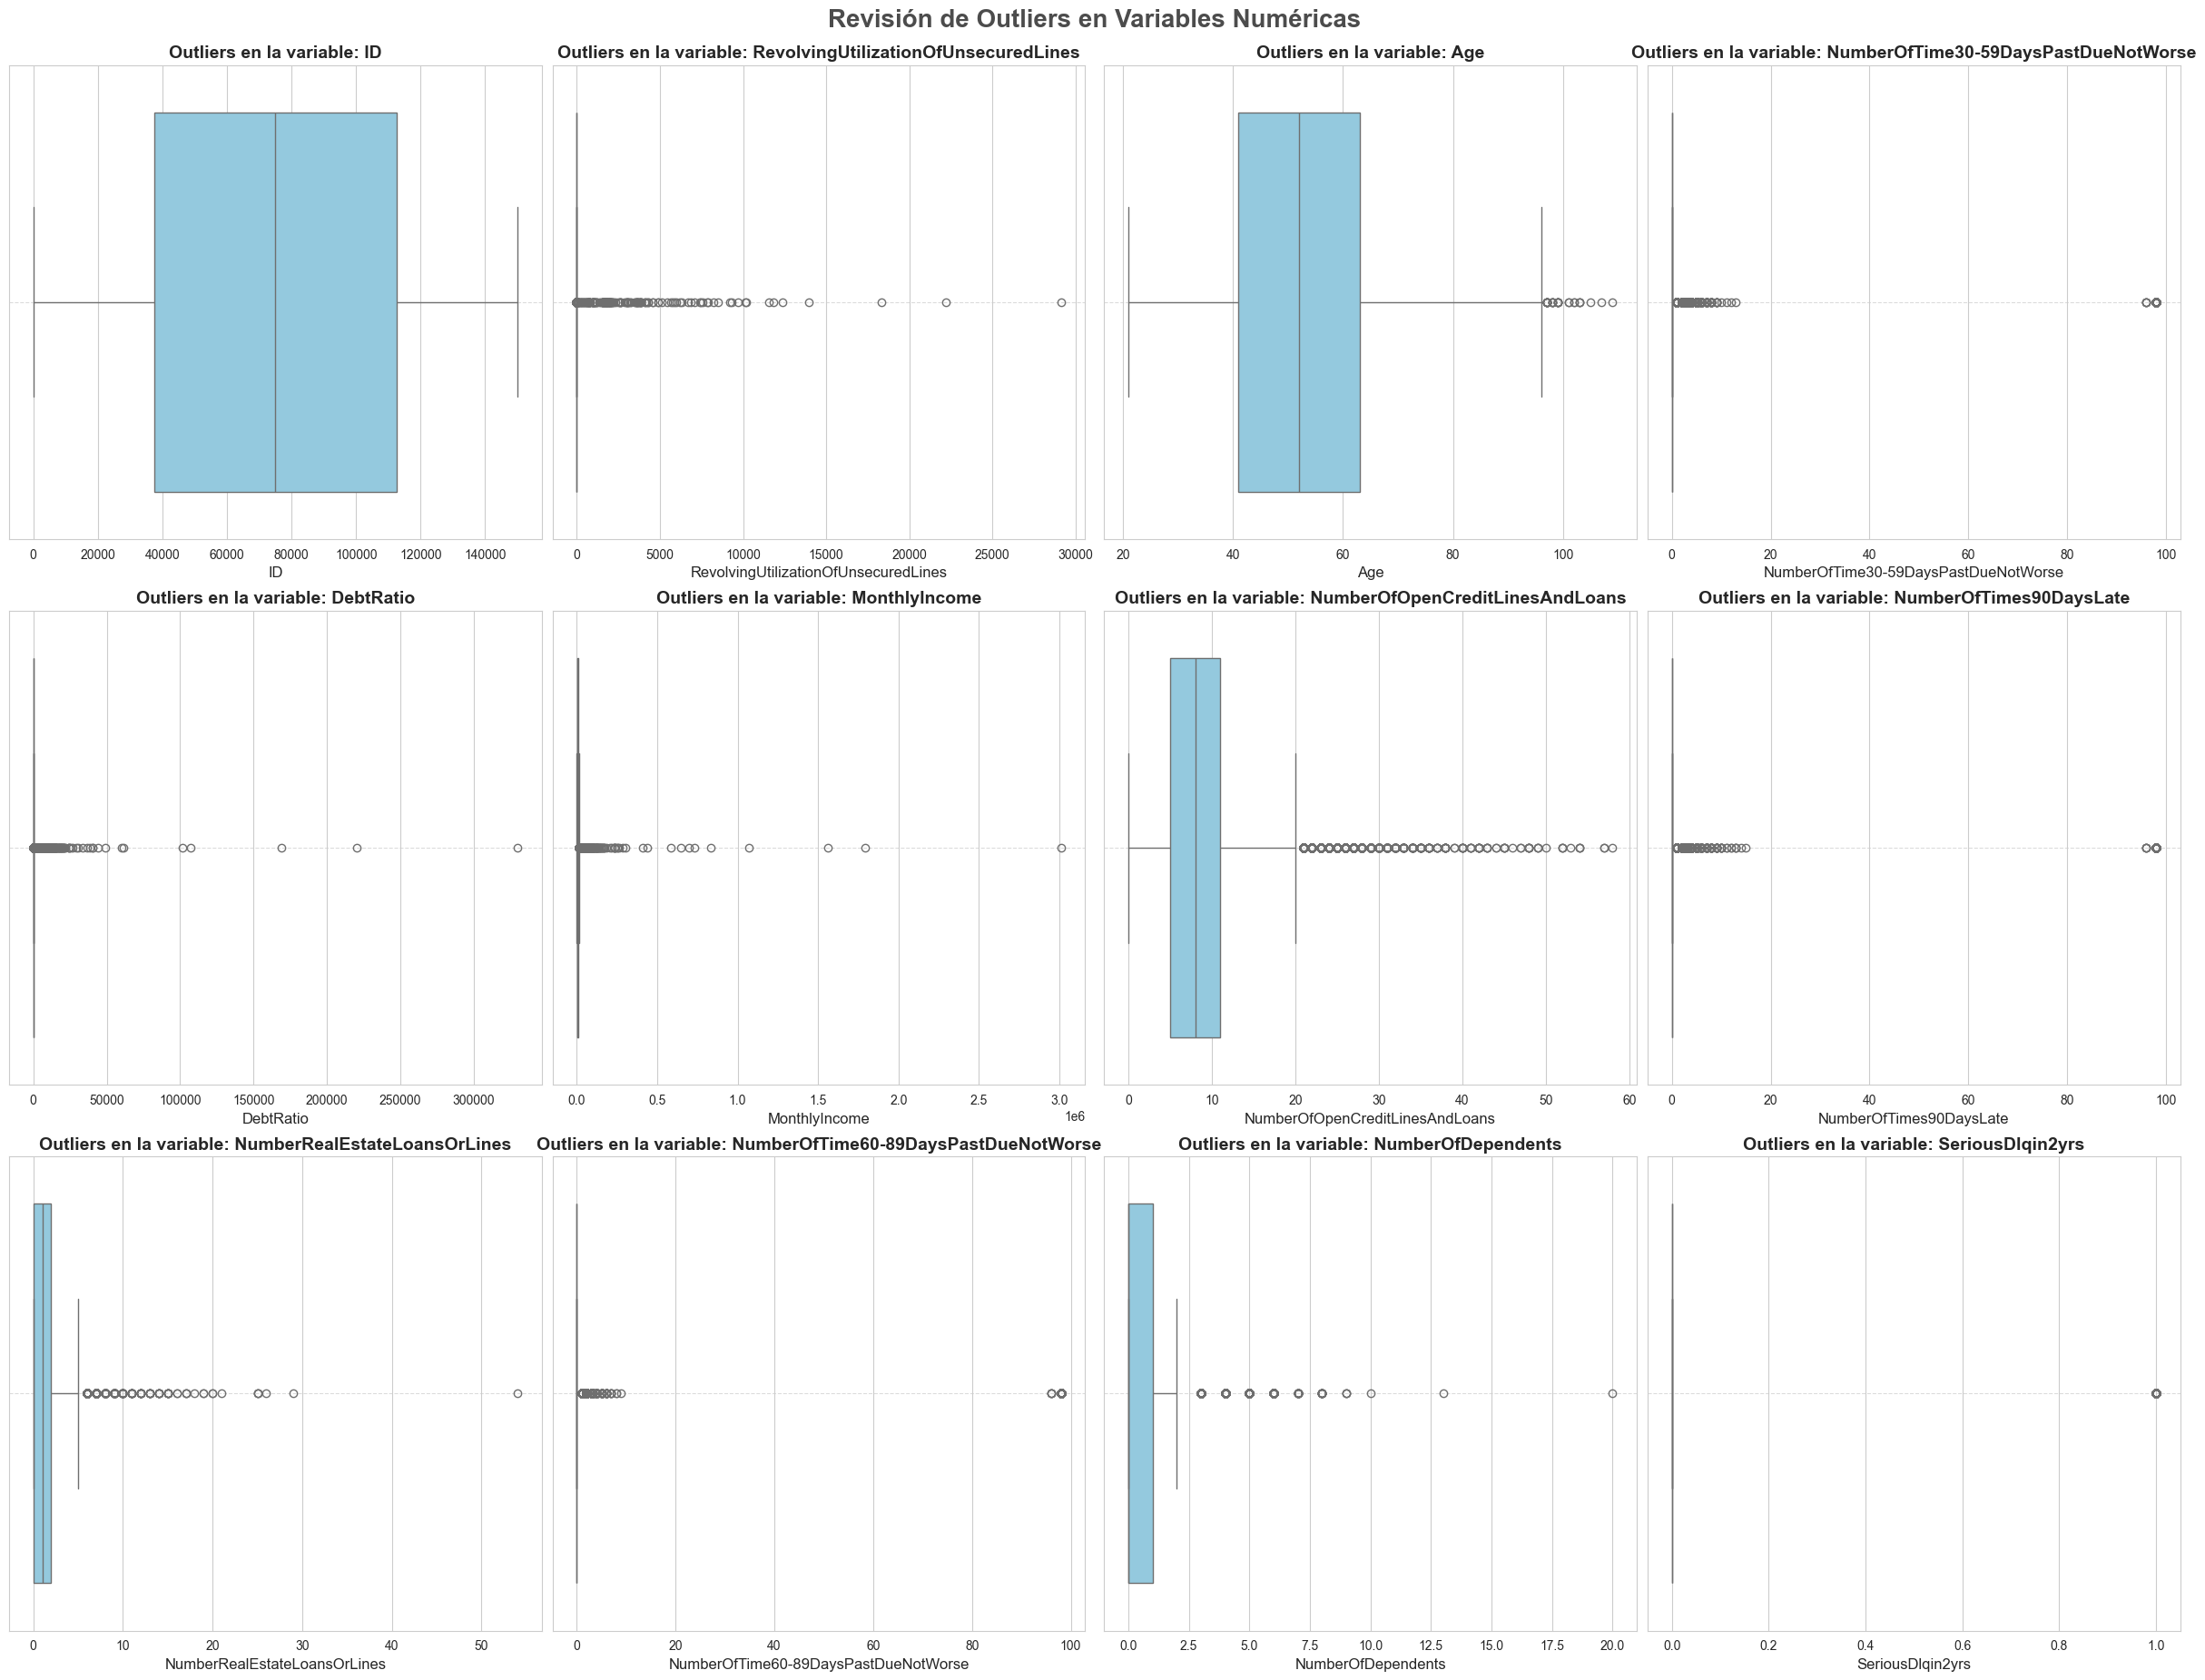

In [14]:
# Filtrar las variables numéricas
variables_numericas = train_df.select_dtypes(include=['int64', 'float64']).columns

# Número de columnas por fila
columns_per_row = 4

# Número total de variables numéricas
total_variables = len(variables_numericas)

# Número de filas necesarias
rows = math.ceil(total_variables / columns_per_row)

# Crear subplots
fig, axes = plt.subplots(rows, columns_per_row, figsize=(24, rows * 6), constrained_layout=True)
axes = axes.flatten()

# Crear boxplots
for i, var in enumerate(variables_numericas):
    sns.boxplot(data=train_df, x=var, ax=axes[i], color="skyblue")
    axes[i].set_title(f"Outliers en la variable: {var}", fontsize=14, fontweight='bold')
    axes[i].set_xlabel(var, fontsize=12)
    axes[i].grid(axis='y', linestyle='--', alpha=0.7)

# Ajustar los ejes vacíos
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Título general
fig.suptitle('Revisión de Outliers en Variables Numéricas', fontsize=20, fontweight='bold', color="#4c4c4c", y=1.02)

plt.show()


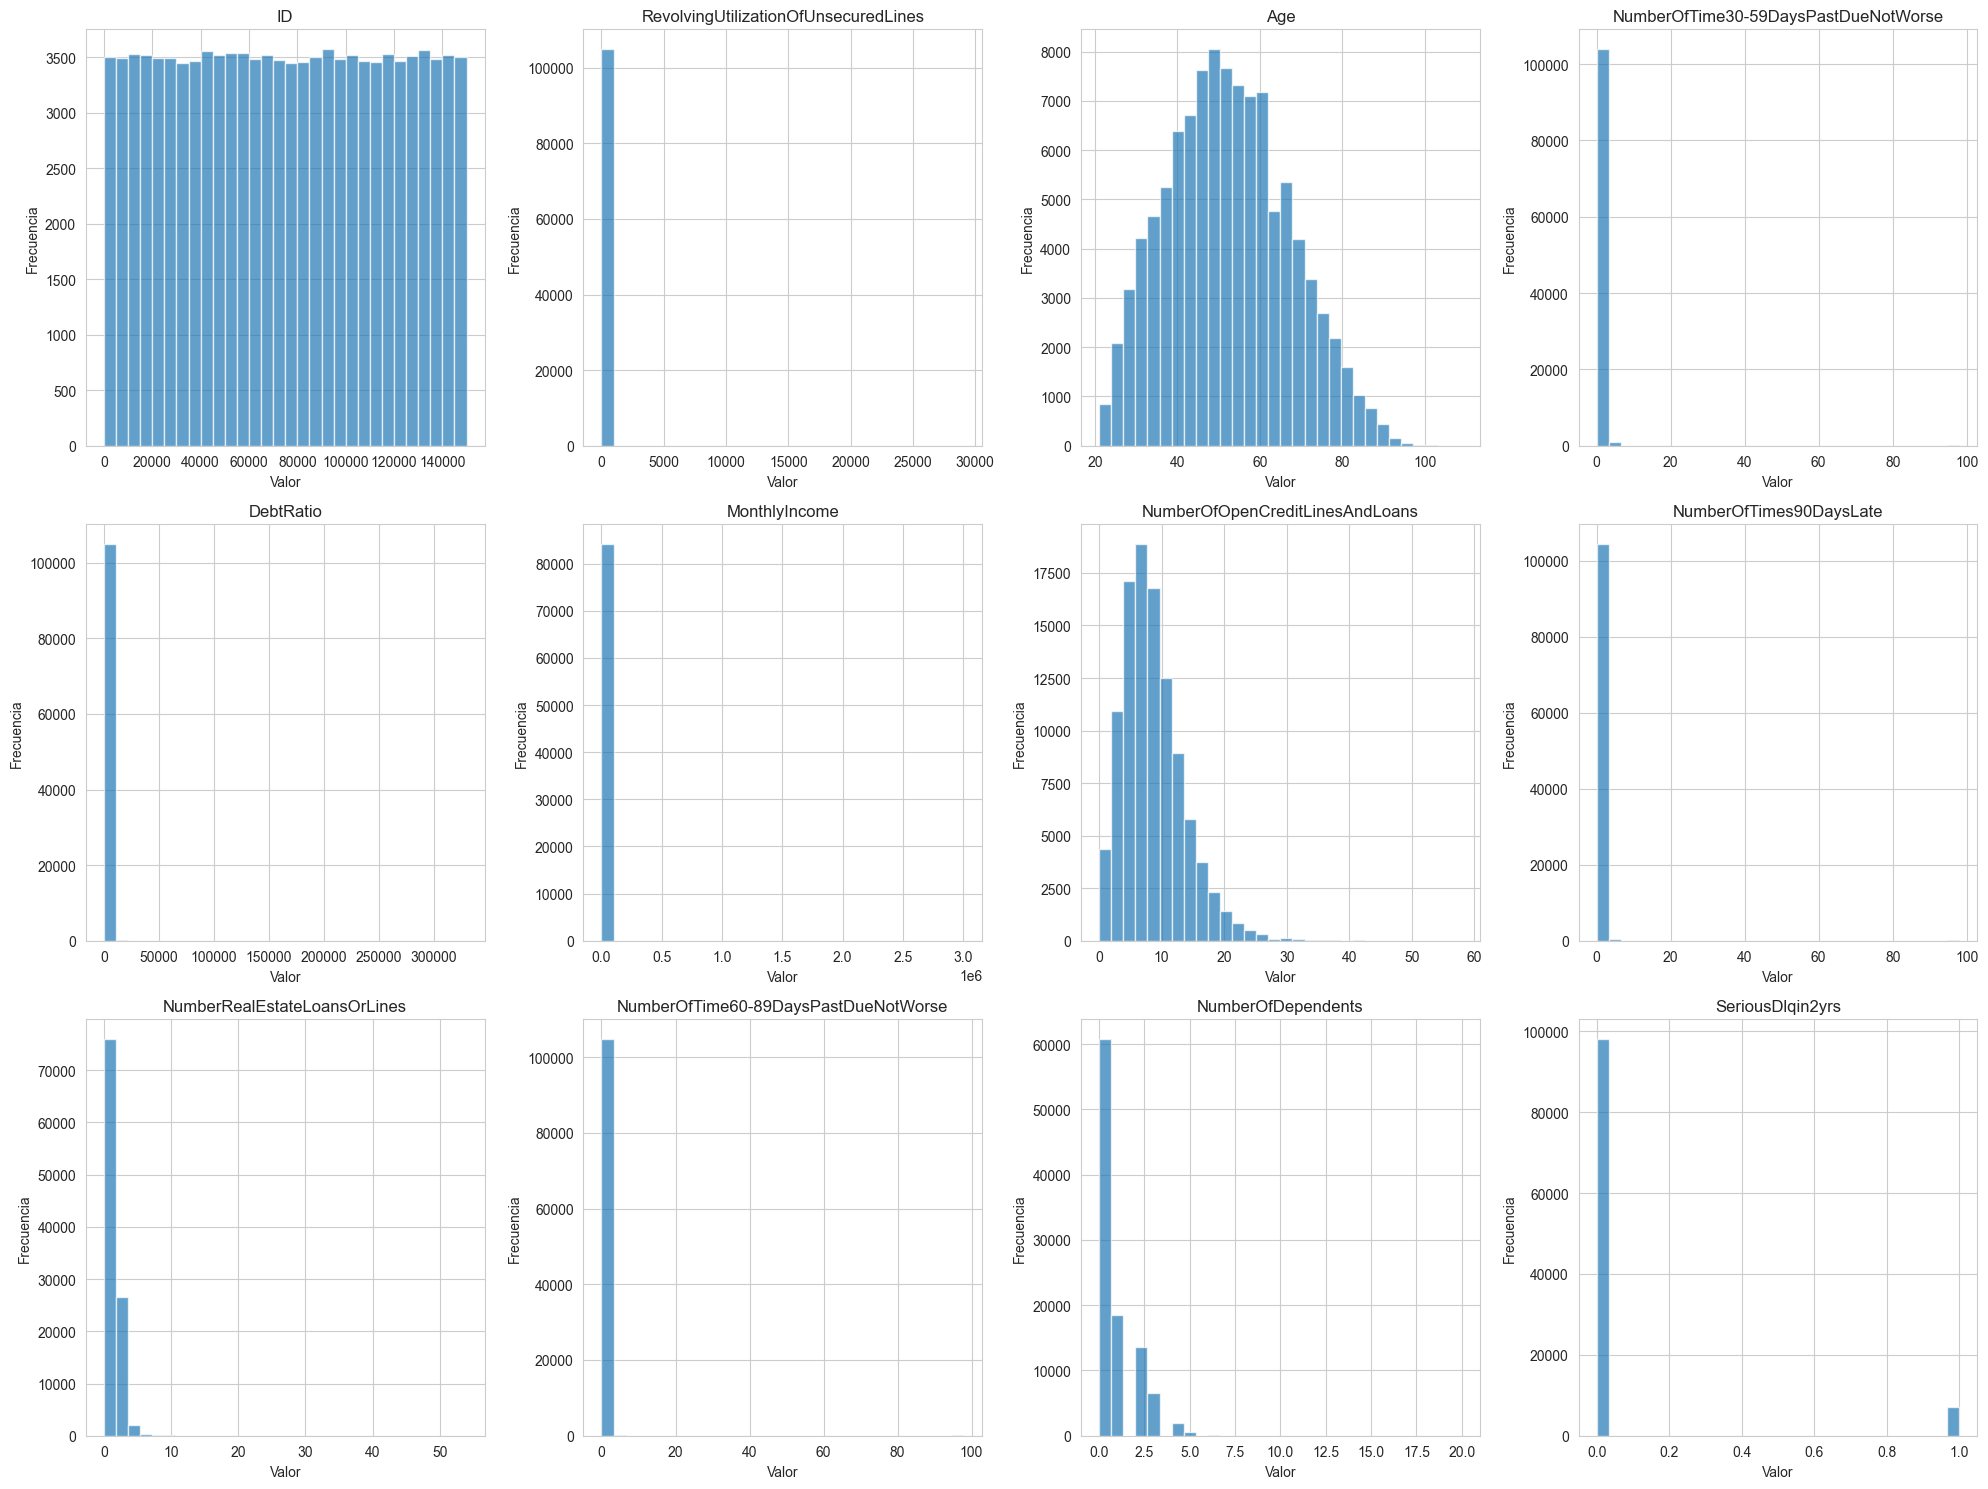

In [15]:
# Listar las columnas que quieres analizar (excluyendo `ID` y `SeriousDlqin2yrs`)
columns = train_df.columns.difference([])
#'ID', 'SeriousDlqin2yrs'

# Número de columnas por fila
columns_per_row = 4

# Calcular el número de filas necesarias
num_rows = -(-len(columns) // columns_per_row)  # División entera hacia arriba

# Crear subplots para las variables
fig, axes = plt.subplots(num_rows, columns_per_row, figsize=(20, 5 * num_rows))
axes = axes.flatten()  # Aplanar los ejes para iterarlos fácilmente

# Graficar cada variable
for i, col in enumerate(columns):
    train_df[col].hist(ax=axes[i], bins=30, alpha=0.7)
    axes[i].set_title(col)
    axes[i].set_xlabel("Valor")
    axes[i].set_ylabel("Frecuencia")

# Ocultar los gráficos vacíos
for i in range(len(columns), len(axes)):
    axes[i].axis('off')

plt.tight_layout()
plt.show()

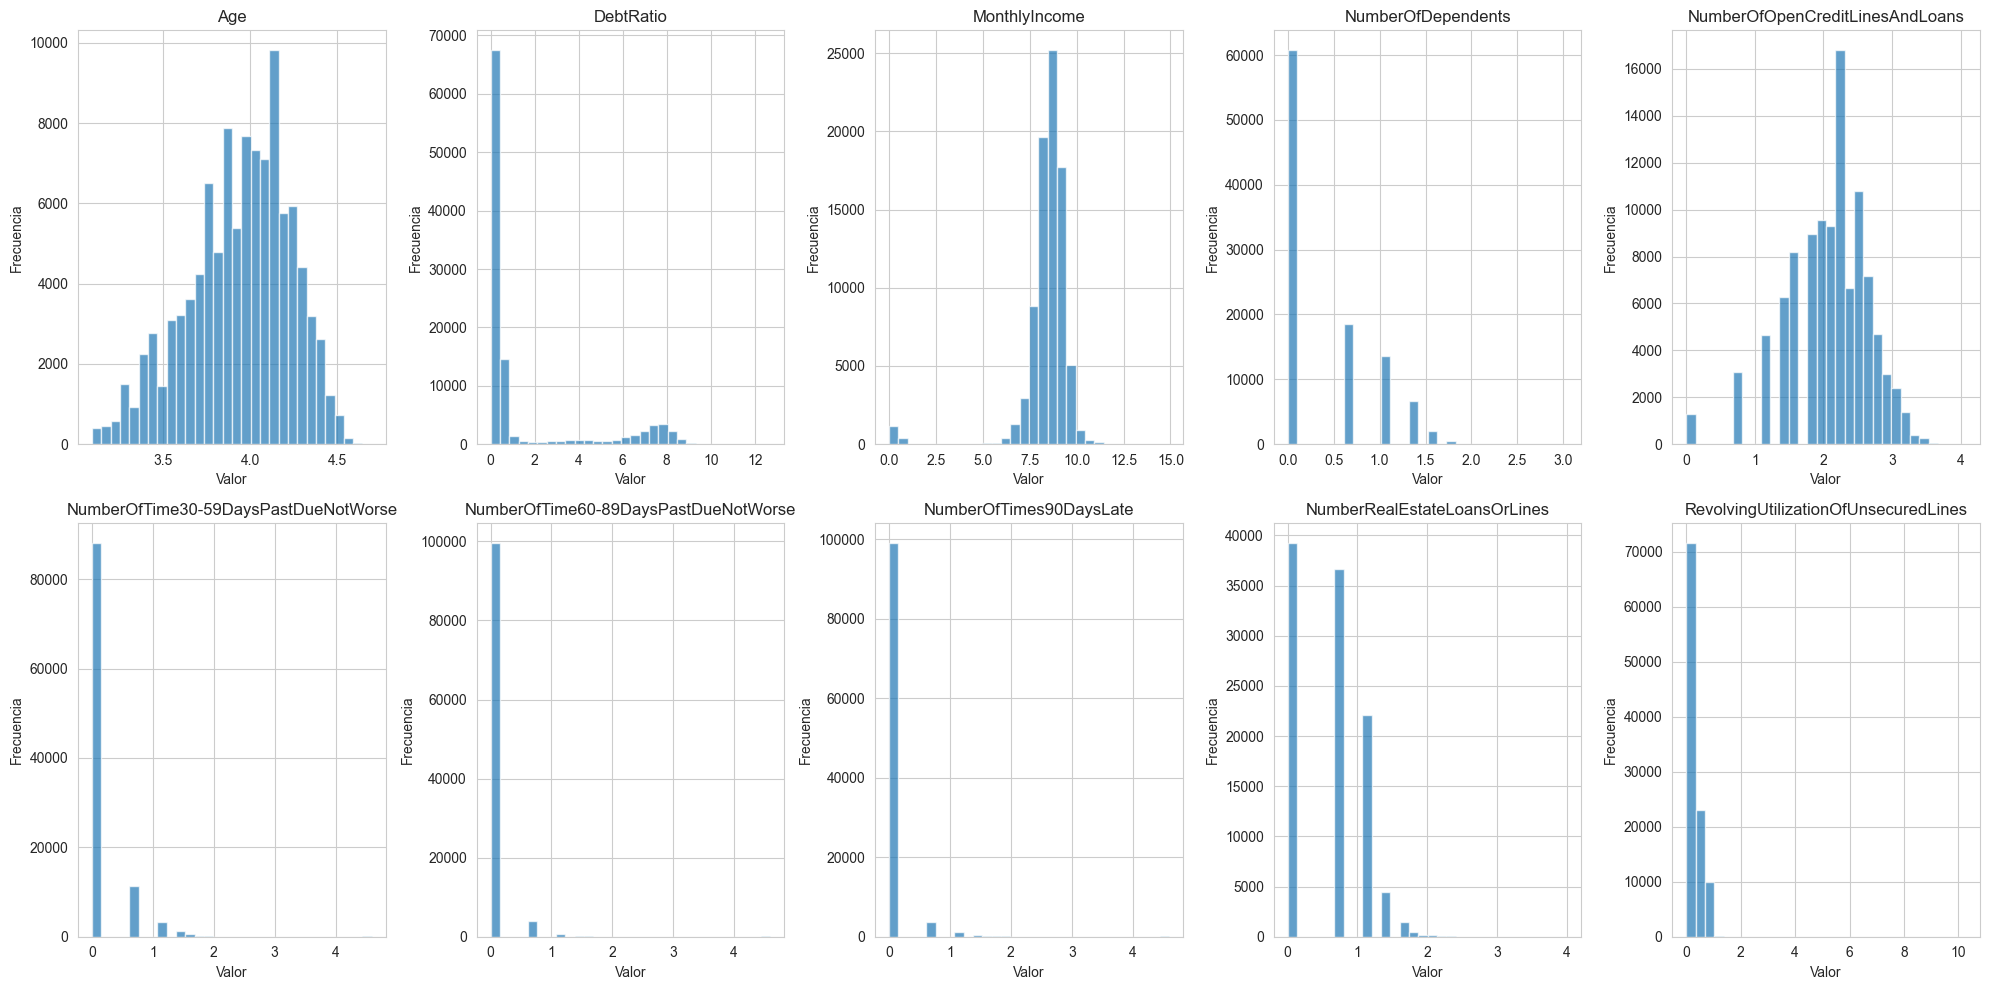

In [16]:
# Columnas a excluir
exclude_columns = ['ID', 'SeriousDlqin2yrs']

# Aplicar transformación logarítmica (agregar 1 para evitar log(0))
log_transformed_df = train_df.copy()
for col in train_df.columns:
    if col not in exclude_columns:
        log_transformed_df[col] = np.log1p(train_df[col])

# Listar las columnas transformadas
columns = log_transformed_df.columns.difference(exclude_columns)

# Configurar visualización de 4 en 4
columns_per_row = 5
num_rows = -(-len(columns) // columns_per_row)  # División entera hacia arriba

# Crear subplots
fig, axes = plt.subplots(num_rows, columns_per_row, figsize=(20, 5 * num_rows))
axes = axes.flatten()

# Graficar las distribuciones
for i, col in enumerate(columns):
    log_transformed_df[col].hist(ax=axes[i], bins=30, alpha=0.7)
    axes[i].set_title(col)
    axes[i].set_xlabel("Valor")
    axes[i].set_ylabel("Frecuencia")

# Ocultar gráficos vacíos si hay menos de 4 en la última fila
for i in range(len(columns), len(axes)):
    axes[i].axis('off')

plt.tight_layout()
plt.show()

In [17]:
# Imputacion con la mediana los valores nulos que es 0 como en la mayoria
median_dependents = log_transformed_df['NumberOfDependents'].median()
log_transformed_df['NumberOfDependents'].fillna(median_dependents, inplace=True)

In [18]:
# Excluir columnas irrelevantes como 'ID' (u otras no útiles para imputar)
features = log_transformed_df.columns.difference(['ID', 'SeriousDlqin2yrs'])

# Dividir datos en conjunto de entrenamiento y predicción
train_data = log_transformed_df[log_transformed_df['MonthlyIncome'].notnull()]
predict_data = log_transformed_df[log_transformed_df['MonthlyIncome'].isnull()]

X_train = train_data[features]
y_train = train_data['MonthlyIncome']

X_predict = predict_data[features]

# Entrenar modelo
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Evaluar el modelo (opcional)
X_train_sample, X_valid_sample, y_train_sample, y_valid_sample = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42
)
y_valid_pred = model.predict(X_valid_sample)
print("MSE en validación:", mean_squared_error(y_valid_sample, y_valid_pred))

# Predecir valores faltantes
predicted_values = model.predict(X_predict)

# Imputar valores faltantes
log_transformed_df.loc[log_transformed_df['MonthlyIncome'].isnull(), 'MonthlyIncome'] = predicted_values

# Verificar imputación
print("Valores nulos en MonthlyIncome:", log_transformed_df['MonthlyIncome'].isnull().sum())


MSE en validación: 2.058451349192548e-06
Valores nulos en MonthlyIncome: 0


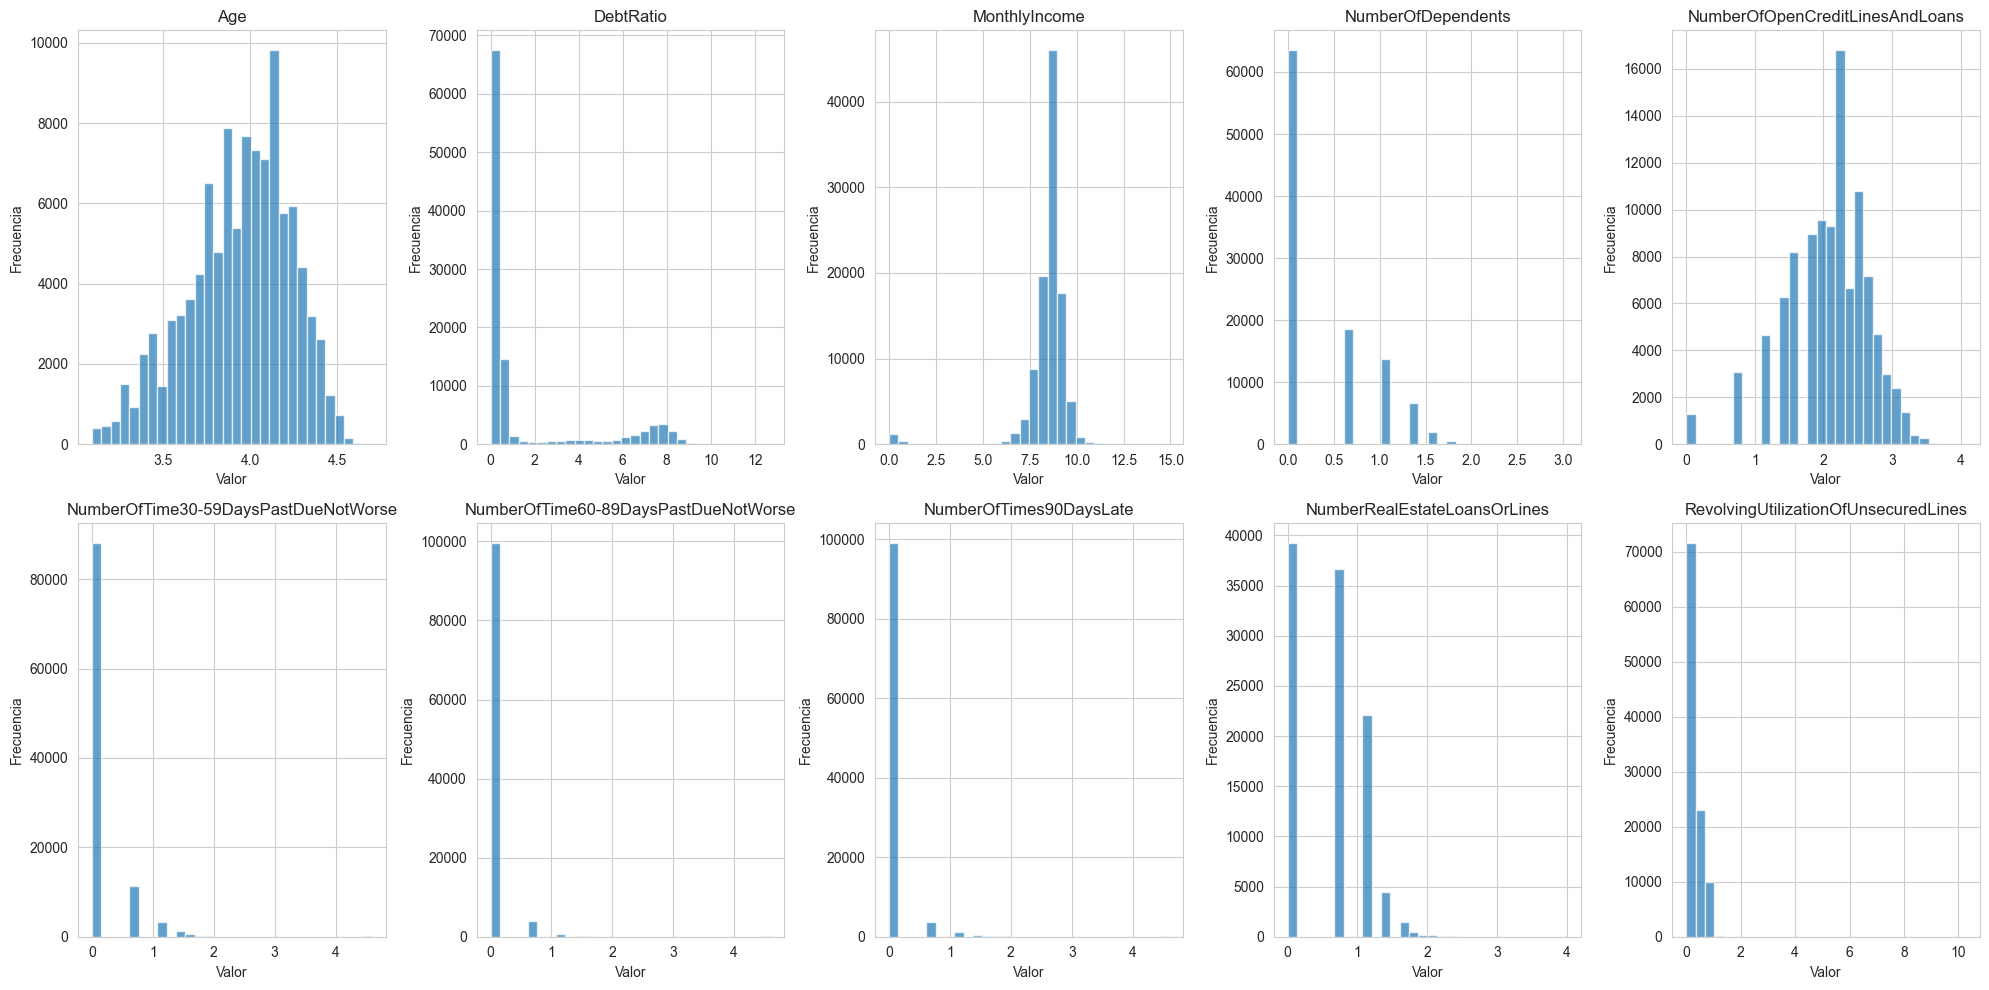

In [19]:
# Columnas a excluir
exclude_columns = ['ID', 'SeriousDlqin2yrs']

# Listar las columnas transformadas
columns = log_transformed_df.columns.difference(exclude_columns)

# Configurar visualización de 4 en 4
columns_per_row = 5
num_rows = -(-len(columns) // columns_per_row)  # División entera hacia arriba

# Crear subplots
fig, axes = plt.subplots(num_rows, columns_per_row, figsize=(20, 5 * num_rows))
axes = axes.flatten()

# Graficar las distribuciones
for i, col in enumerate(columns):
    log_transformed_df[col].hist(ax=axes[i], bins=30, alpha=0.7)
    axes[i].set_title(col)
    axes[i].set_xlabel("Valor")
    axes[i].set_ylabel("Frecuencia")

# Ocultar gráficos vacíos si hay menos de 4 en la última fila
for i in range(len(columns), len(axes)):
    axes[i].axis('off')

plt.tight_layout()
plt.show()

In [20]:
# 1. Transformación logarítmica (excepto columnas excluidas)
exclude_columns = ['ID', 'SeriousDlqin2yrs']
log_transform_cols = [col for col in test_df.columns if col not in exclude_columns]

for col in log_transform_cols:
    test_df[col] = np.log1p(test_df[col])

# 2. Imputación de valores nulos
# Filtrar características relevantes (usando las mismas que en train)
X_predict_test = test_df[features]

# Predecir los valores faltantes en test_df
test_df.loc[test_df['MonthlyIncome'].isnull(), 'MonthlyIncome'] = model.predict(X_predict_test[test_df['MonthlyIncome'].isnull()])

# Imputar NumberOfDependents con el mismo valor usado en train_df
test_df['NumberOfDependents'].fillna(0, inplace=True)

# Verificar si quedan valores nulos
print(test_df.isnull().sum())


ID                                      0
RevolvingUtilizationOfUnsecuredLines    0
Age                                     0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
MonthlyIncome                           0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    0
NumberOfDependents                      0
dtype: int64


Características seleccionadas: Index(['Age', 'NumberOfDependents', 'NumberOfOpenCreditLinesAndLoans',
       'NumberOfTime30-59DaysPastDueNotWorse',
       'NumberOfTime60-89DaysPastDueNotWorse', 'NumberOfTimes90DaysLate',
       'RevolvingUtilizationOfUnsecuredLines'],
      dtype='object')

Optimizing LightGBM...
Best parameters for LightGBM: {'model__subsample': 0.7, 'model__reg_lambda': 0.01, 'model__reg_alpha': 1, 'model__n_estimators': 250, 'model__min_child_samples': 40, 'model__max_depth': 6, 'model__learning_rate': 0.25, 'model__colsample_bytree': 0.8}
Best AUC (CV): 0.9874

Optimizing XGBoost...
Best parameters for XGBoost: {'model__subsample': 0.8, 'model__reg_lambda': 1.5, 'model__reg_alpha': 0.1, 'model__n_estimators': 300, 'model__min_child_weight': 2, 'model__max_depth': 10, 'model__learning_rate': 0.15, 'model__gamma': 0.2, 'model__colsample_bytree': 0.8}
Best AUC (CV): 0.9815

--- Evaluando modelo: LightGBM ---

--- Evaluación en Entrenamiento ---
AUC-ROC (Train): 0.99

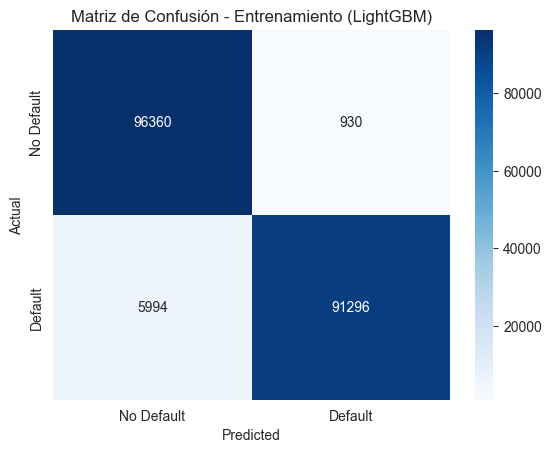

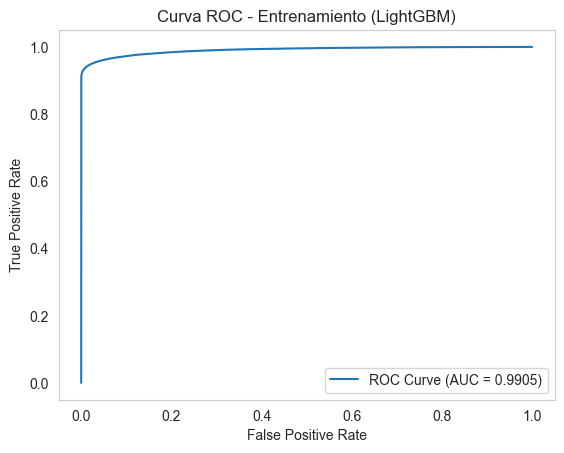

Archivo generado: submission_LightGBM.csv

--- Evaluando modelo: XGBoost ---

--- Evaluación en Entrenamiento ---
AUC-ROC (Train): 0.9927

Classification Report (Train):
               precision    recall  f1-score   support

           0       0.95      0.98      0.96     97290
           1       0.98      0.95      0.96     97290

    accuracy                           0.96    194580
   macro avg       0.96      0.96      0.96    194580
weighted avg       0.96      0.96      0.96    194580



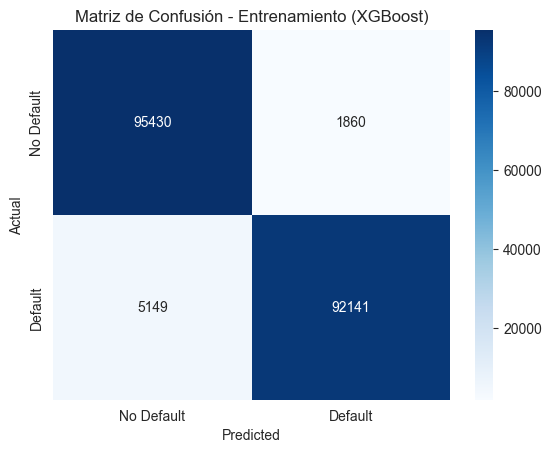

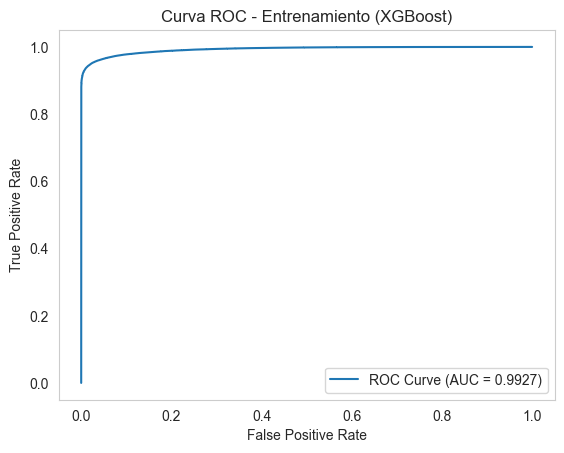

Archivo generado: submission_XGBoost.csv


In [32]:
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.feature_selection import SelectKBest, f_classif
from imblearn.combine import SMOTETomek
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# === Configuración ===
sns.set_style('whitegrid')

# Definir características y target
features = log_transformed_df.columns.difference(['ID', 'SeriousDlqin2yrs'])
X_train = log_transformed_df[features]
y_train = log_transformed_df['SeriousDlqin2yrs']
X_test = test_df[features]

# Balancear las clases con SMOTETomek
smote_tomek = SMOTETomek(random_state=42)
X_train_balanced, y_train_balanced = smote_tomek.fit_resample(X_train, y_train)

# Selección de características
selector = SelectKBest(score_func=f_classif, k=7)
X_train_reduced = selector.fit_transform(X_train_balanced, y_train_balanced)
X_test_reduced = selector.transform(X_test)
selected_features = features[selector.get_support()]
print("Características seleccionadas:", selected_features)

# === Modelos y Parámetros ===
pipelines = {
    'LightGBM': Pipeline([('scaler', StandardScaler()),
                          ('model', LGBMClassifier(random_state=42, class_weight='balanced', verbose=-1))]),
    'XGBoost': Pipeline([('scaler', StandardScaler()),
                         ('model', XGBClassifier(use_label_encoder=False, eval_metric='logloss',
                                                 random_state=42, scale_pos_weight=1.5))])
}

param_grids = {
    'LightGBM': {
        'model__n_estimators': [150, 200, 250],  # Mantener rango cercano al mejor 200
        'model__max_depth': [6, 8, 10],  # Explorar alrededor del mejor 8
        'model__learning_rate': [0.15, 0.2, 0.25],  # Explorar alrededor de 0.2
        'model__reg_alpha': [0.5, 1, 1.5],  # Mantener valores cercanos a 1
        'model__reg_lambda': [0.01, 0.05, 0.1],  # Ajustado para explorar valores pequeños
        'model__colsample_bytree': [0.8, 1.0],  # Explorar entorno del mejor 1.0
        'model__subsample': [0.5, 0.6, 0.7],  # Rango cercano al mejor 0.6
        'model__min_child_samples': [20, 30, 40]  # Explorar alrededor de 30
    },
    'XGBoost': {
        'model__n_estimators': [300, 400, 500],  # Mantener rango cercano al mejor 400
        'model__max_depth': [8, 10, 12],  # Explorar alrededor del mejor 10
        'model__learning_rate': [0.15, 0.2, 0.25],  # Explorar alrededor de 0.2
        'model__reg_alpha': [0.01, 0.05, 0.1],  # Ajustado para explorar entorno del mejor 0.01
        'model__reg_lambda': [0.5, 1, 1.5],  # Ajustar valores cercanos al mejor 1
        'model__colsample_bytree': [0.7, 0.8, 0.9],  # Explorar entorno del mejor 0.8
        'model__subsample': [0.7, 0.8, 0.9],  # Explorar entorno del mejor 0.8
        'model__gamma': [0.05, 0.1, 0.2],  # Mantener rango cercano al mejor 0.1
        'model__min_child_weight': [1, 2, 5]  # Explorar alrededor del mejor 1
    }
}

# Validación cruzada estratificada
stratified_cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# === Optimización de Modelos ===
best_models = {}
for model_name, pipeline in pipelines.items():
    print(f"\nOptimizing {model_name}...")
    random_search = RandomizedSearchCV(
        pipeline,
        param_distributions=param_grids[model_name],
        n_iter=20,
        scoring='roc_auc',
        cv=stratified_cv,
        n_jobs=-1,
        random_state=42
    )
    random_search.fit(X_train_reduced, y_train_balanced)
    best_models[model_name] = random_search.best_estimator_

    print(f"Best parameters for {model_name}: {random_search.best_params_}")
    print(f"Best AUC (CV): {random_search.best_score_:.4f}")

# === Evaluación en Entrenamiento y Generación de Submissions ===
for model_name, model in best_models.items():
    print(f"\n--- Evaluando modelo: {model_name} ---")

    # Predicciones en entrenamiento
    y_train_pred = model.predict(X_train_reduced)
    y_train_pred_proba = model.predict_proba(X_train_reduced)[:, 1]
    train_auc = roc_auc_score(y_train_balanced, y_train_pred_proba)

    print(f"\n--- Evaluación en Entrenamiento ---")
    print(f"AUC-ROC (Train): {train_auc:.4f}")
    print("\nClassification Report (Train):\n", classification_report(y_train_balanced, y_train_pred))

    # Matriz de confusión (Train)
    conf_matrix_train = confusion_matrix(y_train_balanced, y_train_pred)
    sns.heatmap(conf_matrix_train, annot=True, fmt='d', cmap='Blues', xticklabels=['No Default', 'Default'],
                yticklabels=['No Default', 'Default'])
    plt.title(f"Matriz de Confusión - Entrenamiento ({model_name})")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    # Curva ROC (Train)
    fpr_train, tpr_train, _ = roc_curve(y_train_balanced, y_train_pred_proba)
    plt.plot(fpr_train, tpr_train, label=f"ROC Curve (AUC = {train_auc:.4f})")
    plt.title(f"Curva ROC - Entrenamiento ({model_name})")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend(loc='best')
    plt.grid()
    plt.show()

    # Predicciones en prueba
    y_test_pred_proba = model.predict_proba(X_test_reduced)[:, 1]

    # Crear archivo de submission
    submission = pd.DataFrame({
        'ID': test_df['ID'],
        'SeriousDlqin2yrs': y_test_pred_proba
    })
    filename = f'submission_{model_name}.csv'
    submission.to_csv(filename, index=False)
    print(f"Archivo generado: {filename}")
